CAPSTONE PROJECT-1 :- PRCP-1025-FlightPricePrediction
PROJECT TEAM ID :- PTID-CDS-NOV-23-1680


1.Busines Case:- To predict the flight ticket prices based on given  data


Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

**Task 1:**-Prepare a complete data analysis report on the given data.

**Task 2:**-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

2.IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


3.IMPORT DATA SET


In [2]:
Data = pd.read_excel("Flight_Fare.xlsx")
Data


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
pd.set_option("display.max_columns",None)

In [4]:
Data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


 4.DOMAIN ANALYSIS

1.Airline:
This column represents the name of the airline company operating the flight.

2.Date_of_Journey:
This column indicates the date when the journey is scheduled to begin.

3.Source:
The starting location or city from which the flight originates.

4.Destination:
The final destination or city where the flight is scheduled to arrive.

5.Route:
The sequence of connecting cities or airports that the flight will pass through from source to destination.

6.Dep_Time:
The departure time of the flight from the source airport.

7.Arrival_Time:
The expected arrival time of the flight at the destination airport.

8.Duration:
The duration of the flight, indicating the time taken to travel from source to destination.

9.Total_Stops:
The number of stops or layovers during the journey. It can be a direct flight or have one or more layovers.

10.Additional_Info:
Any additional information or notes about the flight that might not be covered by other columns. This could include special services, amenities, or instructions.

11.Price:
The fare or price of the flight ticket. This is the target variable for prediction in your analysis.

5.BASIC CHECKS

In [5]:
Data.head()  # It is use for showing the first 5 column

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
Data.tail() # It is use for showing the bottom column 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
Data.shape   # It is used for showing the number of rows and columns

(10683, 11)

In [8]:
Data.size # It is used for showing the size of the data

117513

In [9]:
Data.dtypes # It is used for showing the data types of all the columns

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
Data.columns   # It is used for showing name of all the columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
Data.info() # to see what kind of datatype it has 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
Data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [14]:
Data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

6. EXPLORATORY DATA ANALYSIS

UNIVARIATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

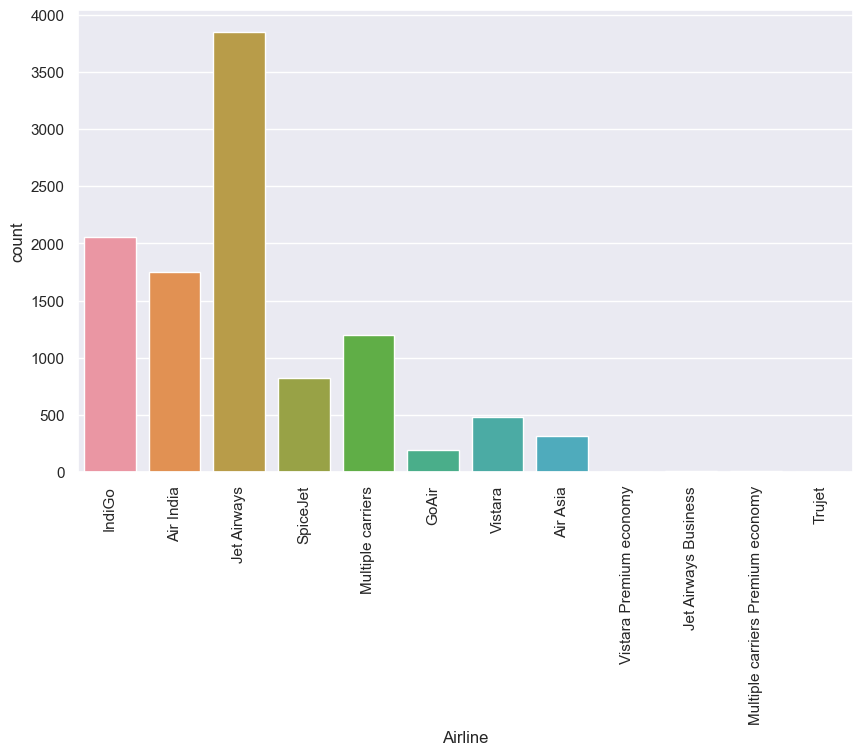

In [15]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x=Data['Airline'], data= Data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

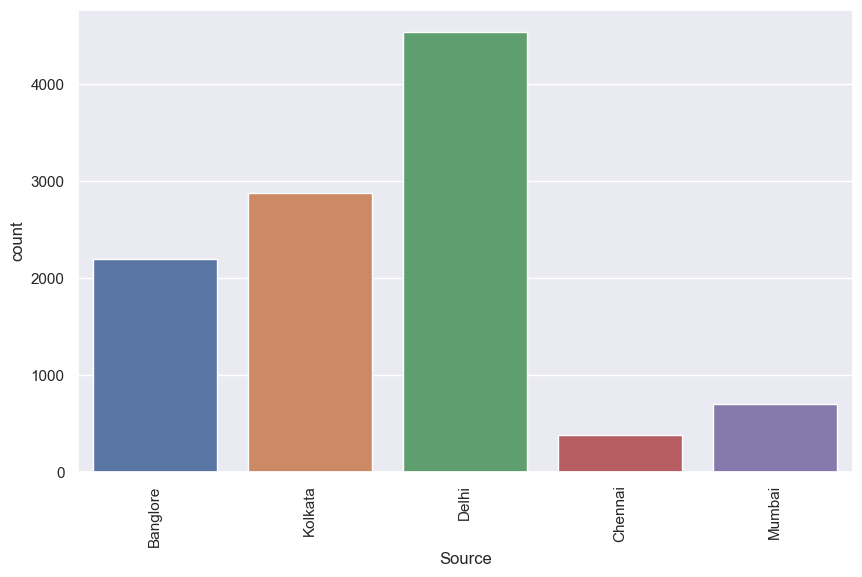

In [16]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x=Data['Source'], data= Data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

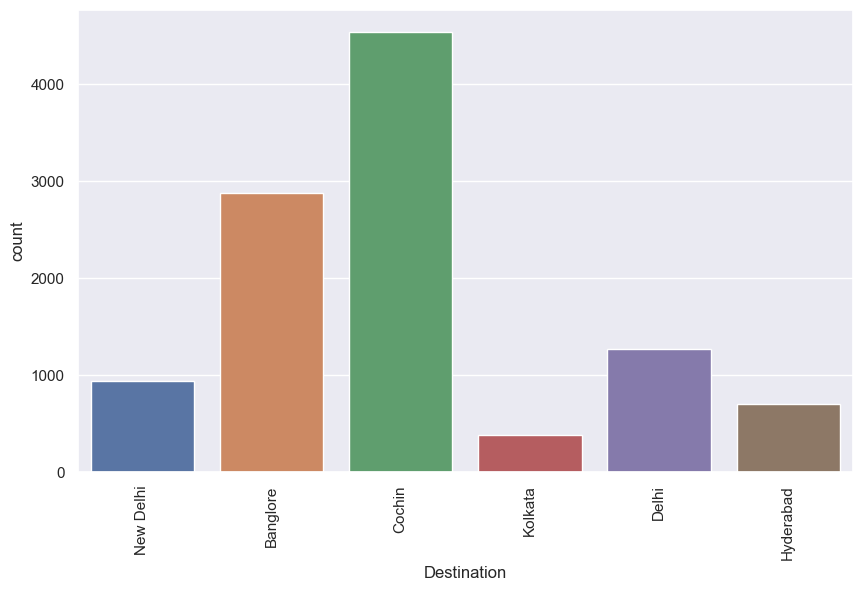

In [17]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x=Data['Destination'], data= Data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

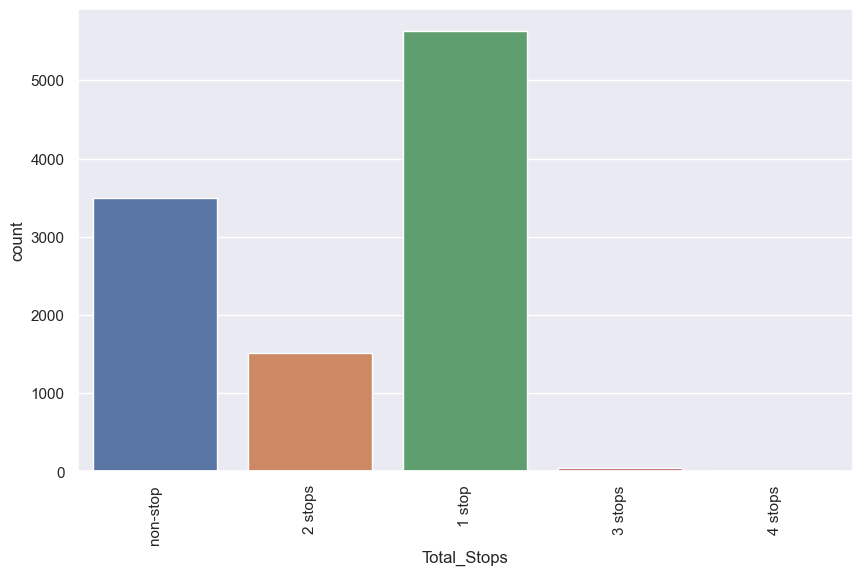

In [18]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x=Data['Total_Stops'], data= Data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

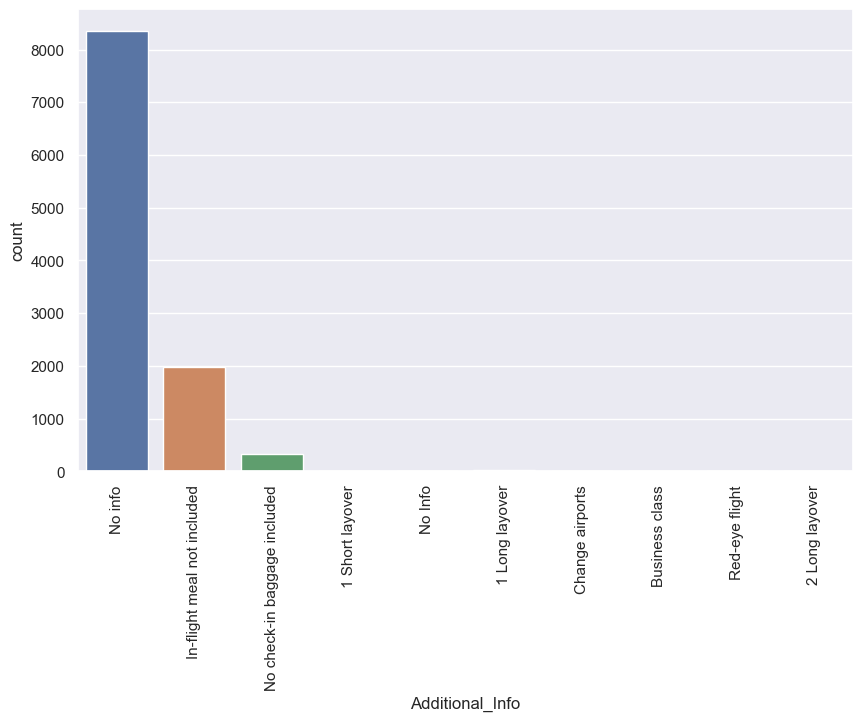

In [19]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x=Data['Additional_Info'], data= Data)
plt.xticks(rotation=90)

 BIVARIATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

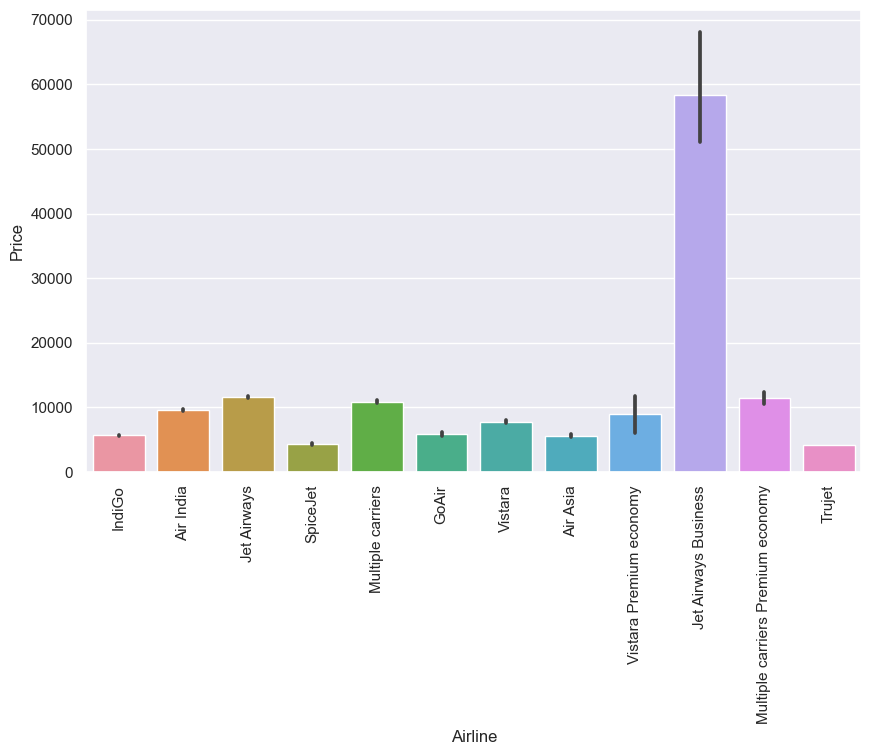

In [20]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x="Airline",y="Price",data=Data)
plt.xticks(rotation=90)

7. CHECK NULL VALUE

In [21]:
Data.isnull().sum() #check the null value present in the data set

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Insights

There are only 2 null values 
1. Route column
2. Total_Stops column

First we drop Route column null value and Total_Stops column null value

In [22]:
Data.dropna(inplace=True) #it is use for drop the null value

In [23]:
Data.shape  # we have removed one row with null value

(10682, 11)

In [24]:
Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Extracting Date and Month from Date of Journey column

### Converting into Datetime:

1. In this data set we can see Date_of_Journey is a object data type.therefore we have to convert this datatype into timestamp so as this coulmn properly for prediction.

2. For this, we require pandas to_datetime to convert the object data type to DateTime data type .

3. dt.day the method will extract only the day from the date.

4. dt.month the method will extract only the month of that date.

In [25]:
Data['journey_Date'] = pd.to_datetime(Data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [26]:
Data['journey_month'] = pd.to_datetime(Data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [27]:
Data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [28]:
# since we have converted Date_of_Journey column into integers, Now we can drop it as Original Date of Journey column is of no use.
# droping date of journey column as we have allready extracted data and month
Data.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

# extracting hours
Data['Dep_hour'] = pd.to_datetime(Data.Dep_Time).dt.hour

# extracting mintues
Data['Dep_min'] = pd.to_datetime(Data.Dep_Time).dt.minute

# Now we can drop Dep_Time as it is of no use
Data.drop(['Dep_Time'], axis = 1, inplace=True)

In [31]:
Data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [32]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# extract hours
Data['Arrival_hour'] = pd.to_datetime(Data.Arrival_Time).dt.hour

#extract mintues
Data['Arrival_minute'] = pd.to_datetime(Data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it of no use 
Data.drop(['Arrival_Time'], axis=1, inplace=True)

In [33]:
Data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30


In [34]:
# Time taken by plane to reach destination is called duration
# It is the different between departure Time and Arrival time

duration = list(Data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" # Adds 0 minute
        else:
             duration[i] = "0h " + duration[i] # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [35]:
# Adding duration_hours and duration_mins list to 'Data' dataframe

Data['Duration_hour'] = duration_hours
Data['Duration_mins'] = duration_mins 

In [36]:
Data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [37]:
#now we drop the duration column
Data.drop(['Duration'],axis=1, inplace= True)

In [38]:
Data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


HANDLING CATEGORICAL DATA


one can find many ways to handle categorical data. some of them categorical data are.

1. Nominal Data = data are not in any order - OneHotEncoder is used in this case
2. Ordinal Data = data are in order - LabelEncoder is used in this case

In [39]:
Data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

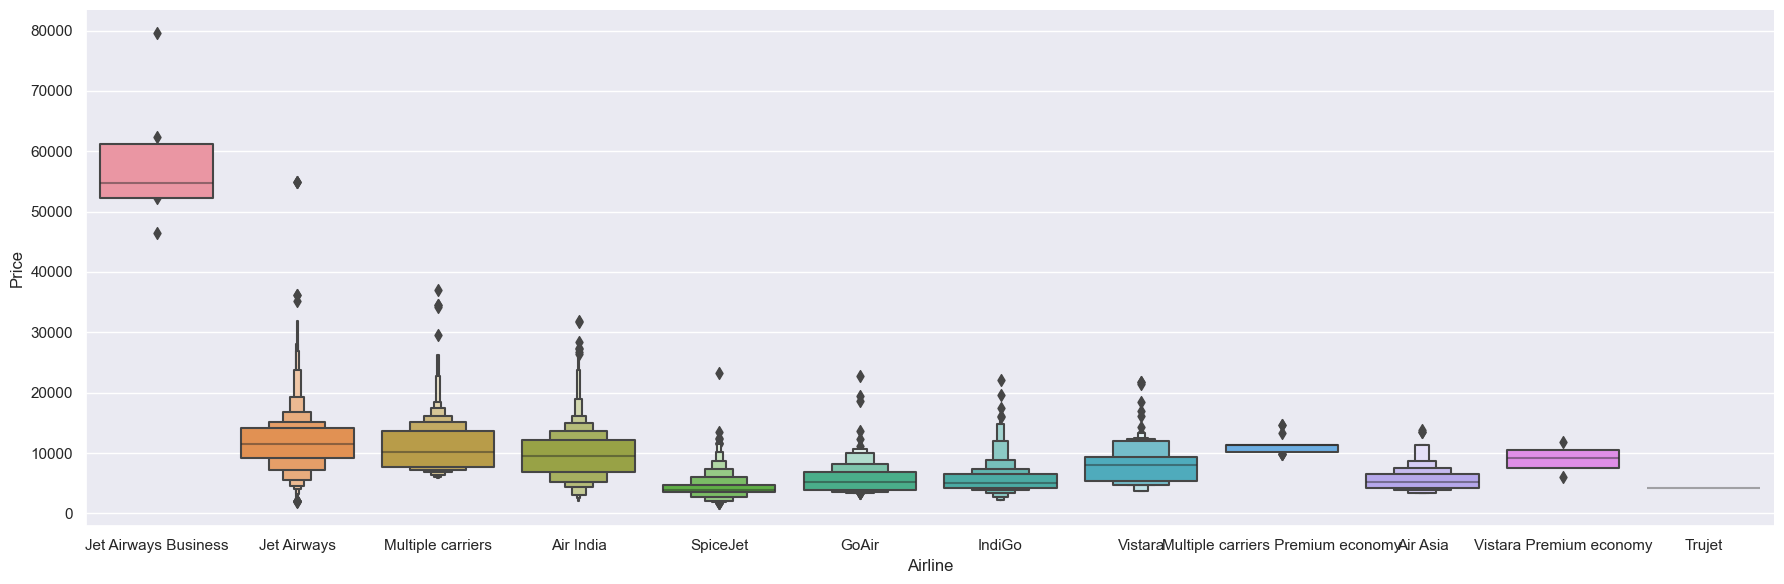

In [40]:
# from graph we can see that jet Airways Business have the highest price. 
# Apart from the first Airline almost all are having similar median
sns.set(rc={'figure.figsize':(20,20)})
sns.catplot(y = 'Price', x = 'Airline', data= Data.sort_values("Price", ascending = False), kind = "boxen", height = 6,aspect =3)
plt.show()

In [41]:
Data2 = Data.copy()

In [42]:
#OneHotEncoding 
df1=pd.get_dummies(Data2["Airline"],drop_first=True)
Data2=pd.concat([Data2,df1],axis=1).drop(["Airline"],axis=1)

In [43]:
Data2.head(3)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False


In [44]:
Data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

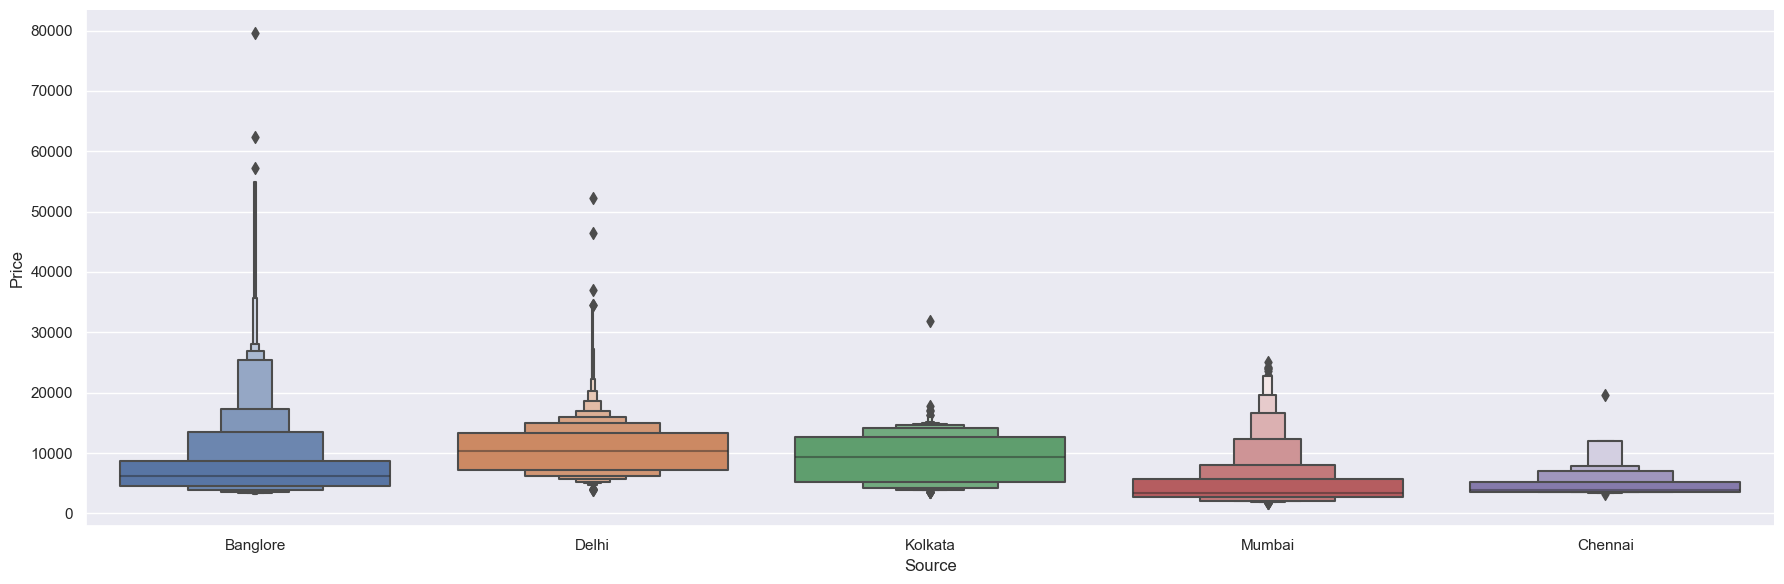

In [45]:
sns.set(rc={'figure.figsize':(20,20)})
sns.catplot(y = 'Price', x = 'Source', data= Data.sort_values("Price", ascending = False), kind = "boxen", height = 6,aspect =3)
plt.show()

In [46]:
df2=pd.get_dummies(Data2["Source"],drop_first=True)
Data2=pd.concat([Data2,df2],axis=1).drop(["Source"],axis=1)

In [47]:
Data2.head(2)

,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [48]:
Data2['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [49]:
df3 = pd.get_dummies(Data2['Destination'],drop_first= True)
Data2 = pd.concat([Data2,df3], axis=1).drop(['Destination'],axis=1)

In [50]:
Data2.head(3)

,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


In [51]:
Data2['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [52]:
# Additional info contains almost 80% no info
# Route and Total stops are related to each other

Data2.drop(["Route", "Additional_Info"], axis = 1, inplace=True)

In [53]:
Data2.head(2)

,Total_Stops,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2 stops,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [54]:
Data2['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [55]:
Data2.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

In [56]:
df = Data2
df.head(2)

,Total_Stops,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


SCALING

In [57]:
x=df.drop("Price",axis=1)
x.head()

,Total_Stops,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)

[[0.         0.88461538 0.         ... 0.         0.         1.        ]
 [0.5        0.         0.66666667 ... 0.         0.         0.        ]
 [0.5        0.30769231 1.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.5        0.30769231 0.66666667 ... 0.         0.         0.        ]]


8. FEATURE ENGINEERING

In [59]:
Data2 = df.iloc[0:10,0:10]
Data2

,Total_Stops,Price,journey_Date,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hour,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
6,1,11087,12,3,18,55,10,25,15,30
7,1,22270,1,3,8,0,5,5,21,5
8,1,11087,12,3,8,55,10,25,25,30
9,1,8625,27,5,11,25,19,15,7,50


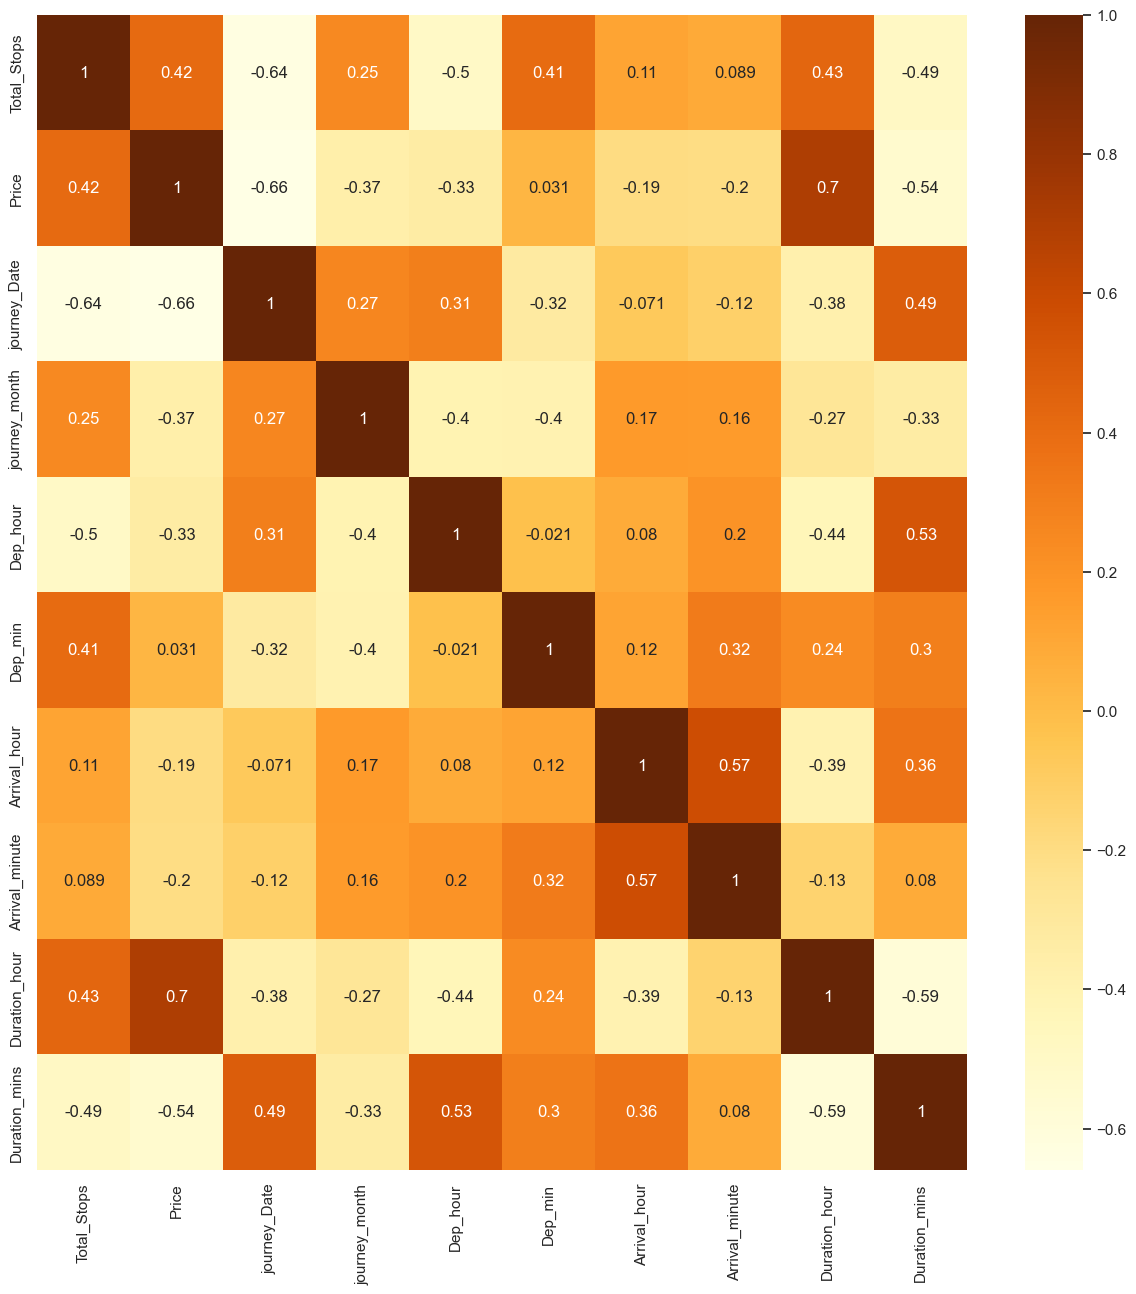

In [60]:
# HeatMap

sns.set(rc= {"figure.figsize":(15,15)})
sns.heatmap(Data2.corr(), annot = True, cmap = 'YlOrBr')
plt.tick_params(labelsize = 11)

9.MODEL CREATION

In [61]:
#  First we have to separate independent and dependent values

x = df.drop("Price", axis =1)
y = df["Price"]

In [62]:
# creatind training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 29)
(8011,)
(2671, 29)
(2671,)


LINEAR REGRESSION

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [66]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

mae = mean_absolute_error(y_test,y_pred)
print(mae)

7835152.94990183
1949.4583561151023


In [67]:
import math
rmse = math.sqrt(mae)
print(rmse)

44.152670996385964


In [68]:
lr_score = r2_score(y_test,y_pred)
lr_score

0.6198931301596478

In [69]:
adj_r2 = 1-(1-lr_score)*(2671-1)/(2671-13-1)
adj_r2

0.6180333675296423

KNN

In [70]:
x = df.drop("Price",axis =1)
y=df['Price']

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)


In [74]:
(y_test!=y_pred).sum()

2639

In [75]:
len(y_test)

2671

In [76]:
(y_test!=y_pred).sum()/len(y_test)

0.9880194683639086

In [77]:
## taking optimal k to determine how many nearest neighbors  to create
# create a list to store the error values for each k
ERROR_RATE=[]
for i in range(1,13):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    error_rate=(y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [78]:
ERROR_RATE


[0.7865967802321228,
 0.9183826282291276,
 0.9591913141145638,
 0.9790340696368401,
 0.9880194683639086,
 0.9962560838637214,
 0.9970048670909771,
 0.9992512167727443,
 0.9996256083863722,
 1.0,
 1.0,
 0.9996256083863722]

Text(0, 0.5, 'Error Rate')

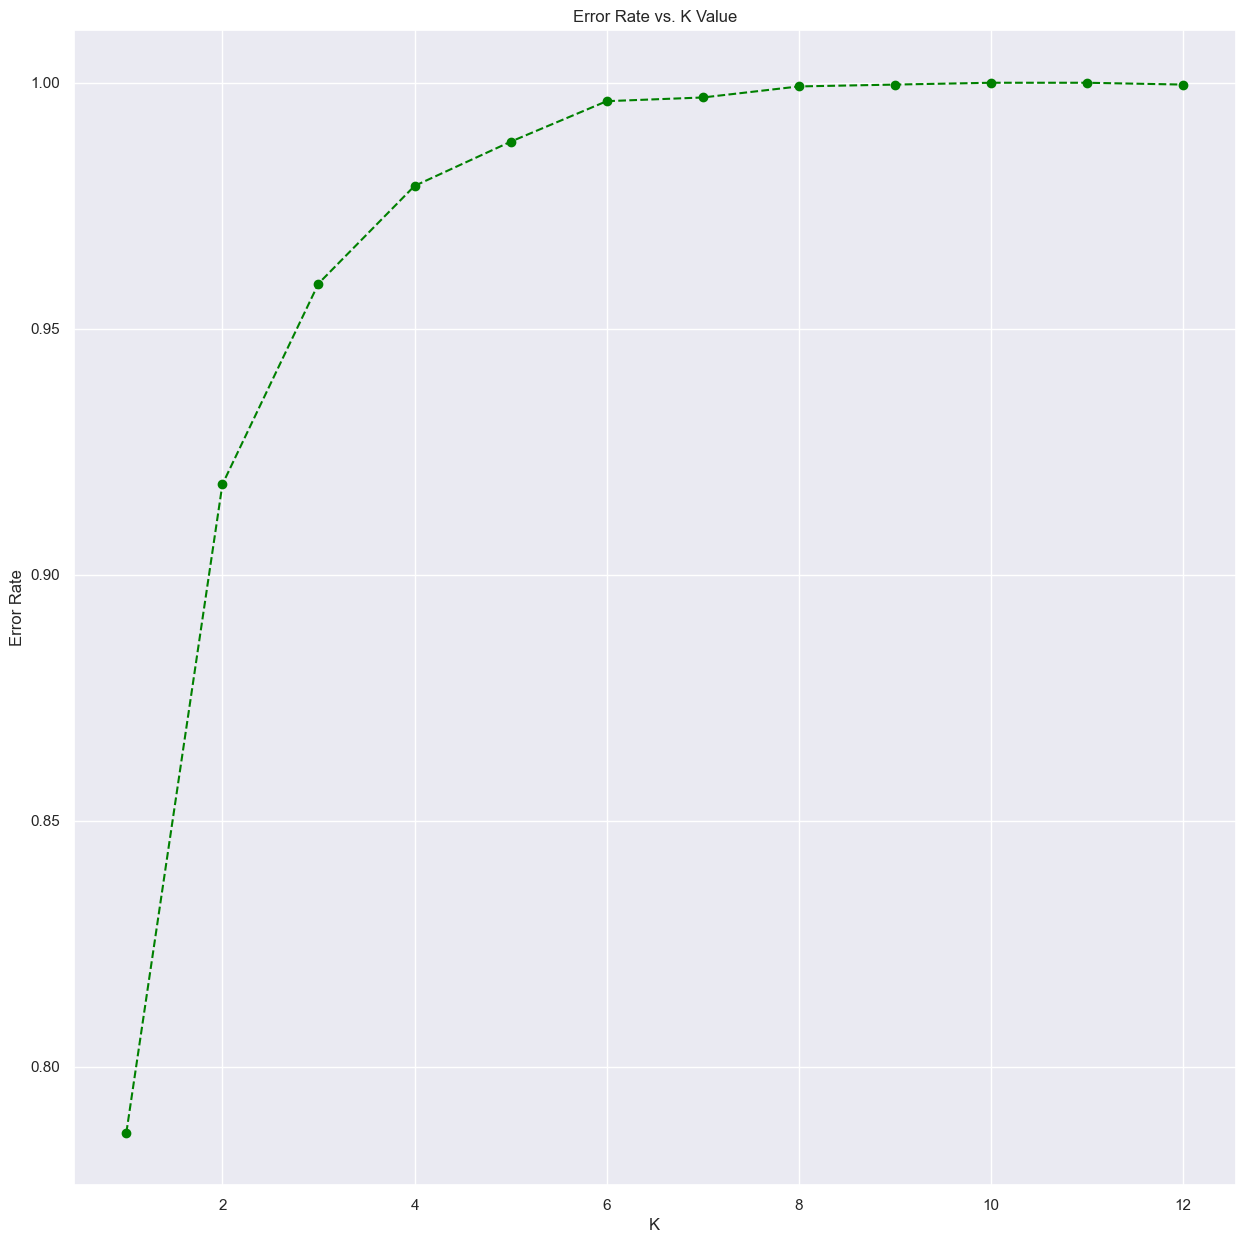

In [79]:
# Lets plot the k-value and error rate
plt.plot(range(1,13),ERROR_RATE,color='green',marker='o',linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [82]:
mse= mean_squared_error(y_test,y_pred)
print(mse)

8908715.681299139


In [83]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

1845.3384500187196


In [84]:
knn_score = r2_score(y_test,y_pred)
print(knn_score)

0.5678113683844929


In [85]:
adj_r2 = 1-(1-knn_score)*(2671-1)/(2671-13-1)
print(adj_r2)

0.5656967834349251


DECISION TREE


In [86]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [87]:
from sklearn.model_selection import train_test_split# preparing training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=42)

In [89]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [91]:
mse=mean_squared_error(y_test,y_pred)
mse

6162523.398414451

In [92]:
mae=mean_absolute_error(y_test,y_pred)
mae

1384.6083239735428

In [93]:
dt_score=r2_score(y_test,y_pred)
dt_score

0.7010374278247375

In [94]:
adj_r2=1-(1-dt_score)*(2671-1)/(2671-13-1)
adj_r2

0.6995746828347946

RANDOM FOREST

In [95]:
x = df.drop("Price",axis=1)
y=df['Price']

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [97]:
x.shape

(10682, 29)

In [98]:
y.shape

(10682,)

In [99]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [102]:
MSE=mean_squared_error(y_test,y_pred)
MSE

4163415.8035826497

In [103]:
mae= mean_absolute_error(y_test,y_pred)
mae

1165.3133163411946

In [104]:
RMSE=np.sqrt(MSE)
RMSE

2040.445001361872

In [105]:
r2=r2_score(y_test,y_pred)
r2

0.7980201587559967

In [106]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.7970319246814119

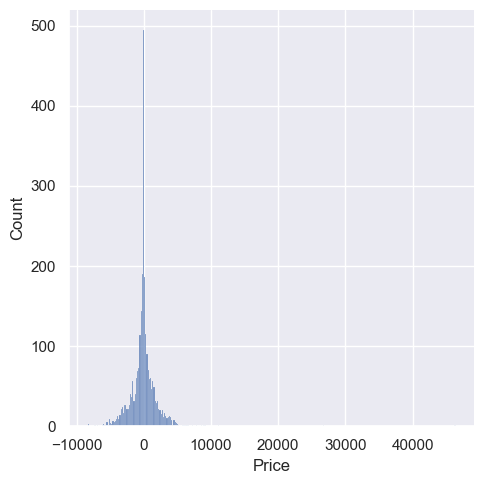

In [109]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(y_test-y_pred)
plt.show()

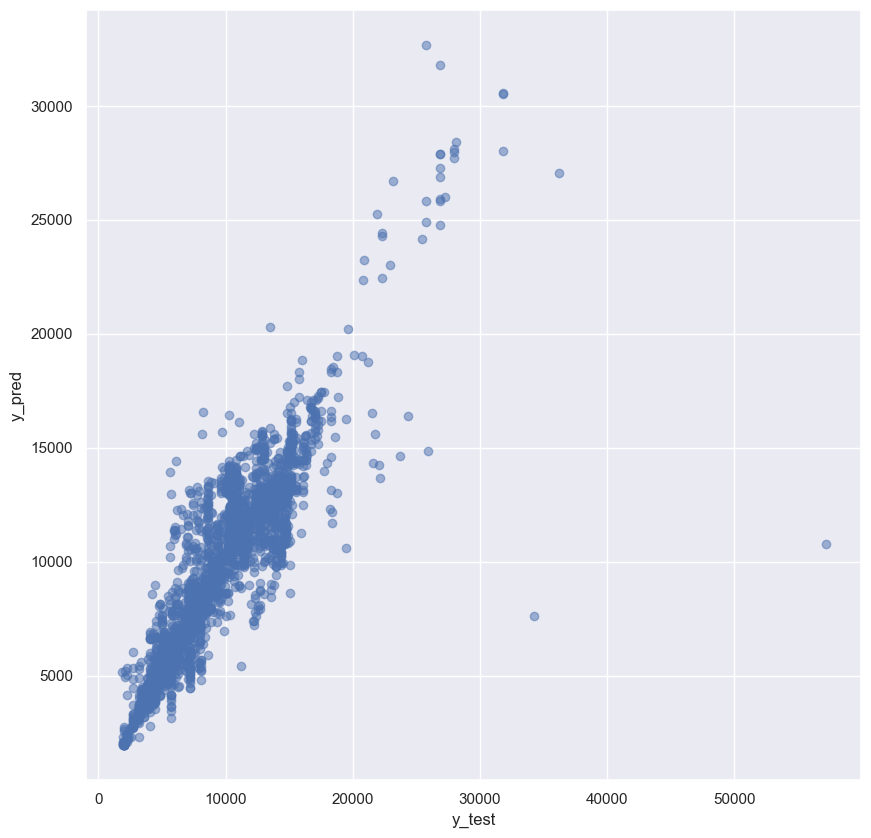

In [108]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
sns.set(rc={"figure.figsize":(6,4)})
plt.show()

HYPER PARAMETERTUNING

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split=[2,3,10,15,100]
min_samples_leaf=[1,2,5,10]

In [112]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

In [113]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [114]:
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [118]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators= 500,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 15)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [120]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1288.538141694705

In [121]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3787208.98222909

In [122]:
RMSE=np.sqrt(MSE)
RMSE

1946.0752766090754

In [123]:
random_forest.score(x_train,y_train)

0.8666542313126485

In [124]:
random_forest.score(x_test,y_test)

0.8162710848312921

In [126]:
rf_score=r2_score(y_test,y_pred)
rf_score

0.8162710848312921

In [127]:
prediction=rf_random.predict(x_test)

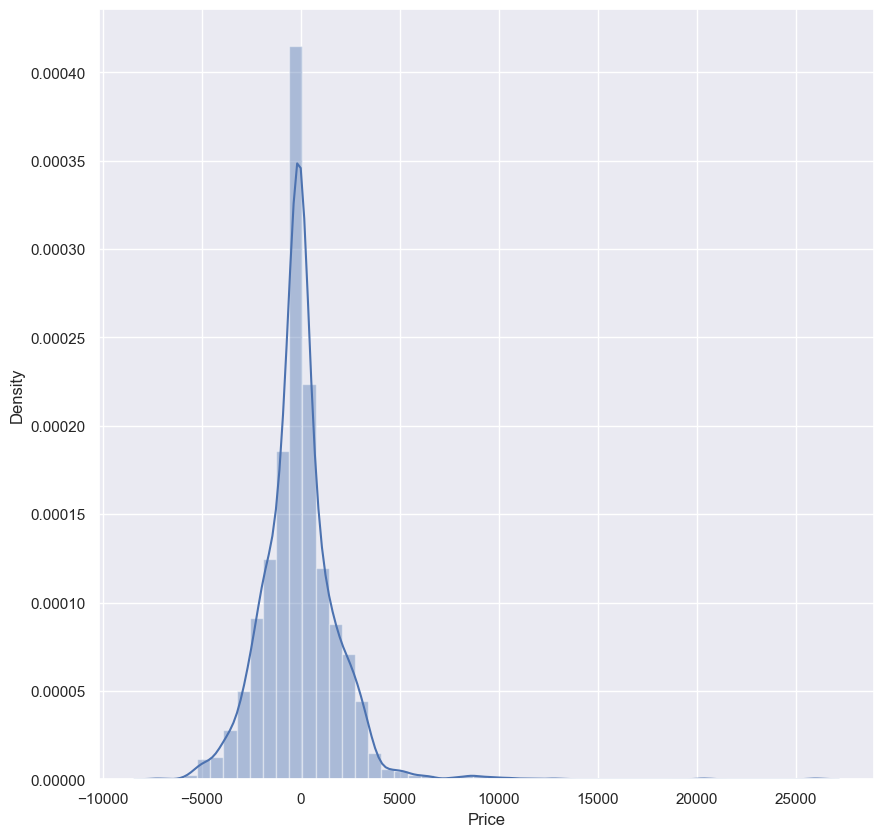

In [128]:
sns.set(rc={"figure.figsize":(10,10)})
sns.distplot(y_test-prediction)
plt.show()

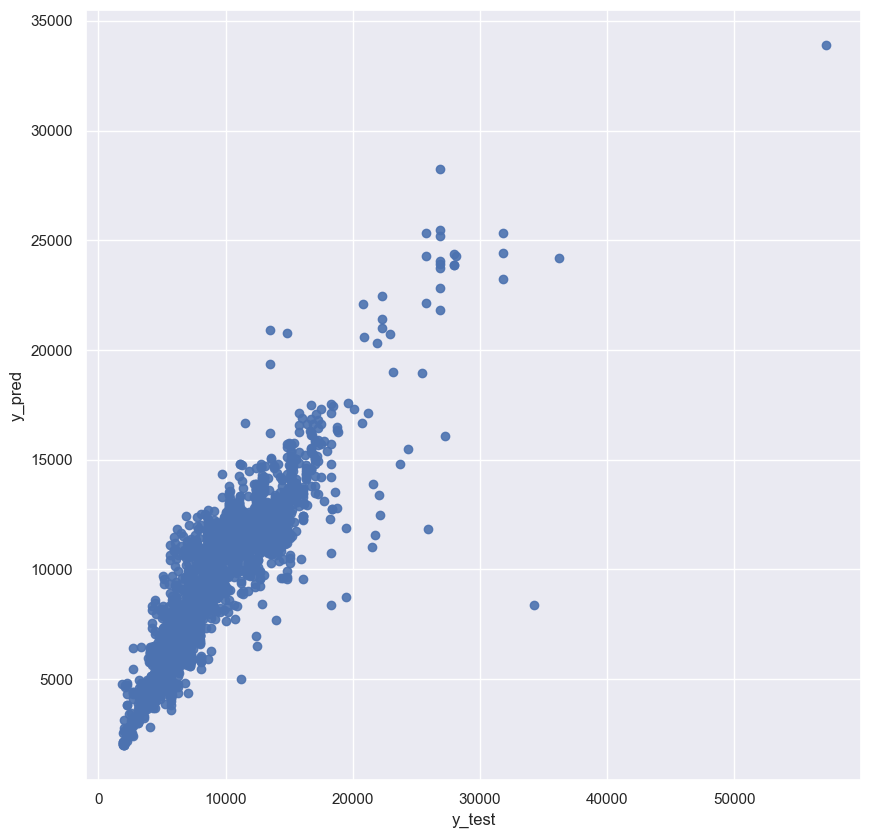

In [129]:
plt.scatter(y_test, y_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("y_pred")
sns.set(rc={"figure.figsize":(6,4)})
plt.show()

GRADIENT BOOSTING

In [131]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=100)
gbm.fit(x_train,y_train)
y_hat=gbm.predict(x_test)

In [136]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [137]:
mse=mean_squared_error(y_test,y_hat)
mse

4304624.152487256

In [138]:
mae=mean_absolute_error(y_test,y_hat)
mae

1487.8418203823517

In [139]:
gb_score=r2_score(y_test,y_hat)
gb_score

0.7911697164173916

In [140]:
adj_r2=1-(1-gb_score)*(2671-1)/(2671-13-1)
adj_r2

0.7901479649358056

HYPER PARAMETERTUNINIG

In [141]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [143]:
rsc=RandomizedSearchCV(estimator=gbm,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [144]:
rsc.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [145]:
rsc.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor(n_estimators= 200,
                                         min_samples_split= 2,
                                         min_samples_leaf= 2,
                                         subsample= 0.9,
                                         learning_rate= 0.1,
                                         max_depth= 5)
gradient_boost.fit(x_train,y_train)
y_hat=gradient_boost.predict(x_test)

In [147]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [148]:
mse=mean_squared_error(y_test,y_hat)
mse

3088069.0763289584

In [149]:
mae=mean_absolute_error(y_test,y_hat)
mae

1189.737156960715

In [150]:
gbst_score=r2_score(y_test,y_hat)
gbst_score

0.8501884675437134

 10.RESULT

* LinearRegressor - CV: 0.61

* KNeighborsRegressor - CV: 0.56

* DecisionTreeRegressor - CV: 0.70

* RandomForestRegressor - CV: 0.81

* GradientBoostingRegressor - CV: 0.85

In [151]:
scores = [lr_score,knn_score,dt_score,rf_score,gbst_score]
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]    

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The R2 score achieved using Linear Regression is: 0.6198931301596478 %
The R2 score achieved using KNN is: 0.5678113683844929 %
The R2 score achieved using Decision Tree is: 0.7010374278247375 %
The R2 score achieved using Random Forest is: 0.8162710848312921 %
The R2 score achieved using Gradient Boosting is: 0.8501884675437134 %


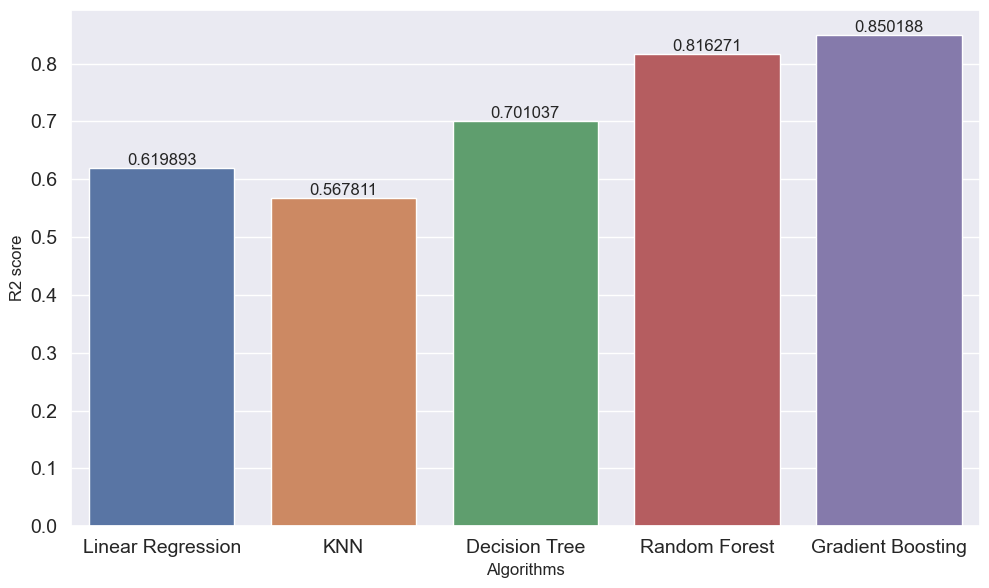

In [152]:
sns.set(rc={"figure.figsize":(10,6)})
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

Conclusion

In conclusion, flight fare prediction using machine learning has demonstrated its efficacy as a valuable tool for both travelers and airlines. The findings from the analysis highlight the following key points:

**Model Performance:** The Gradient Boosting model has emerged as the top performer, achieving an impressive R-squared (r2_score) of 0.85. This high level of accuracy indicates that the model can effectively predict flight fares, providing valuable insights into pricing trends.

**Alternative Model:** The Random Forest model, although slightly less accurate with an R-squared of 0.81, still offers a strong predictive capability. This suggests that there are multiple machine learning approaches available for flight fare prediction, allowing for flexibility in model selection.

**Influential Features:** The analysis has identified several key features that have a significant impact on flight fares. These features, including Total_Stops, Duration, Airline, and Route, are valuable for both travelers and airlines to understand how pricing is determined. Travelers can use this information to make more informed decisions, while airlines can optimize their pricing strategies based on these influential factors.

Overall, flight fare prediction using machine learning offers a powerful means of optimizing pricing strategies for airlines and providing travelers with insights into how ticket prices are determined. With the continuous improvement of machine learning techniques and access to more comprehensive data, the accuracy and utility of flight fare prediction models are likely to increase, making them an indispensable tool in the aviation industry.



Challenges Faced


The challenges that we faced during flight fare prediction using machine learning:

**Converting Date and Time:** Handling date and time data can be challenging because they are often represented in a format that's not directly usable for machine learning models. Converting these into a format that the model can understand can be messy and require careful preprocessing. In the context of flight fare prediction, you might need to extract information like day of the week, month, or time of day from the date and time columns. This requires parsing and feature engineering to create meaningful features for the model.

**Feature Correlation:** When dealing with a large number of columns or features, finding meaningful correlations between them can be challenging. Correlation analysis helps identify which features are strongly related to the target variable (flight fare in this case) and which are not. This is important for feature selection and dimensionality reduction. Correlation matrices, scatter plots, and statistical tests are commonly used techniques to understand feature relationships. However, for a large number of columns, this process can become complex and time-consuming.

**Hyperparameter Tuning:** Hyperparameter tuning involves finding the best set of hyperparameters for a machine learning model to achieve optimal performance. This process often requires multiple iterations of training and evaluating the model with different hyperparameter configurations. It can be time-consuming because it involves a search in a high-dimensional space of hyperparameters, and each iteration requires training the model, which can be computationally expensive
